In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

## Read first time

In this cell I will read for the rist time. I need to transform the dataset for having range -1:1.
I will save the data in HDF5 for faster upload

In [4]:
genoTableRaw = pd.read_csv('../../Numeric-fastPHASE-imputed-243623-SNPs-combined-10K-Chip-Single-and-Double-Digestion-GBS.txt', sep='\t', header=0)
genoTableRaw.head()

,taxa,Chr01_97670,Chr01_97701,Chr01_97716,Chr01_97721,Chr01_97808,Chr01_98768,Chr01_98935,Chr01_99285,Chr01_103581,...,sc09737ln2051_933_A_G_469467397,sc09754ln2049_872_A_C_469502176,sc09833ln2034_1171_G_A_469663747,sc09833ln2034_399_C_T_469662975,sc09867ln2028_610_C_T_469732277,sc09915ln2022_1787_A_G_469830647,sc09947ln2017_1192_A_G_469894659,sc10003ln2009_1678_C_A_470007833,sc10021ln2001_533_T_C_470042786,sc10022ln2002_1089_C_T_470045343
0,115m,0,0,0,0,0,2,2,2,0,...,2,0,0,0,2,2,0,0,0,2
1,6r_42,0,0,0,0,0,2,2,2,0,...,2,0,0,0,2,2,0,0,0,2
2,92bg_7,0,0,0,0,0,2,2,2,0,...,2,0,0,0,2,0,2,0,0,2
3,92us_1006,0,0,0,0,0,2,2,2,0,...,2,0,2,2,2,2,0,0,2,2
4,a_285,0,0,0,0,0,2,2,0,0,...,2,0,0,0,2,0,0,0,0,2


In [8]:
# drop Taxa column
genoData = genoTableRaw.drop('taxa', axis=1)
genoData.head()
# Conver
final_SNPs = genoData.applymap(lambda x: x-1)
final_SNPs.head()

,Chr01_97670,Chr01_97701,Chr01_97716,Chr01_97721,Chr01_97808,Chr01_98768,Chr01_98935,Chr01_99285,Chr01_103581,Chr01_103625,...,sc09737ln2051_933_A_G_469467397,sc09754ln2049_872_A_C_469502176,sc09833ln2034_1171_G_A_469663747,sc09833ln2034_399_C_T_469662975,sc09867ln2028_610_C_T_469732277,sc09915ln2022_1787_A_G_469830647,sc09947ln2017_1192_A_G_469894659,sc10003ln2009_1678_C_A_470007833,sc10021ln2001_533_T_C_470042786,sc10022ln2002_1089_C_T_470045343
0,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
1,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,-1,1,-1,-1,1
3,-1,-1,-1,-1,-1,1,1,1,-1,-1,...,1,-1,1,1,1,1,-1,-1,1,1
4,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,1,-1,-1,-1,1,-1,-1,-1,-1,1


In [11]:
# dump to HDF5 object
final_SNPs.to_hdf('SNPs_data.hdf5', 'snptable')

## HDF5 data file created

### Start from here cause it should be faster

In [2]:
final_SNPs = pd.read_hdf('../../SNPs_data.hdf5', 'snptable')
final_SNPs.head()

,Chr01_97670,Chr01_97701,Chr01_97716,Chr01_97721,Chr01_97808,Chr01_98768,Chr01_98935,Chr01_99285,Chr01_103581,Chr01_103625,...,sc09737ln2051_933_A_G_469467397,sc09754ln2049_872_A_C_469502176,sc09833ln2034_1171_G_A_469663747,sc09833ln2034_399_C_T_469662975,sc09867ln2028_610_C_T_469732277,sc09915ln2022_1787_A_G_469830647,sc09947ln2017_1192_A_G_469894659,sc10003ln2009_1678_C_A_470007833,sc10021ln2001_533_T_C_470042786,sc10022ln2002_1089_C_T_470045343
0,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
1,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,1,1,1,-1,1,...,1,-1,-1,-1,1,-1,1,-1,-1,1
3,-1,-1,-1,-1,-1,1,1,1,-1,-1,...,1,-1,1,1,1,1,-1,-1,1,1
4,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,1,-1,-1,-1,1,-1,-1,-1,-1,1


In [3]:
# read all phenotype data
pheno_data = pd.read_csv('../../../Adjusted-means-for-Agronomic-traits-with-race-and-market-calss-info.txt', sep='\t', header=0)
pheno_data.head()

,supop,market_class,taxa,df_co,dm_co,ch_co,lg_co,gh_co,sw_co,df_mi,...,dm_ne,ch_ne,lg_ne,sw_ne,df,dm,ch,lg,gh,sw
0,MA,black,115m,49,92,50,4,2,20.0,41,...,96,41,4,20.5,49,102,45,3.67,2.5,21.5
1,DJ,pink,6r_42,46,90,41,5,3,29.9,38,...,101,40,5,30.5,47,103,37,5.00,3.0,32.3
2,MA,black,92bg_7,49,87,48,3,3,22.8,44,...,79,33,2,21.7,50,92,39,2.33,2.5,21.7
3,DJ,pinto,92us_1006,46,82,45,1,2,30.3,38,...,78,45,1,29.2,45,90,43,1.33,2.0,31.3
4,MA,cream_caroca,a_285,51,94,55,3,3,22.2,45,...,95,40,3,20.9,52,103,48,3.00,2.5,23.1


In [4]:
# extract flowering time
df_data_all = pheno_data[['df_co', 'df_mi', 'df_ne','df_nd', 'df']]
df_data_all.head()

,df_co,df_mi,df_ne,df_nd,df
0,49,41,47,59,49
1,46,38,45,59,47
2,49,44,45,60,50
3,46,38,41,56,45
4,51,45,52,58,52


(30, 75)

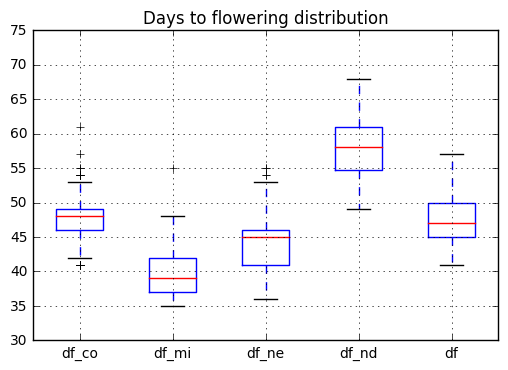

In [5]:
df_data_all.boxplot()
plt.title('Days to flowering distribution')
plt.ylim((30, 75))

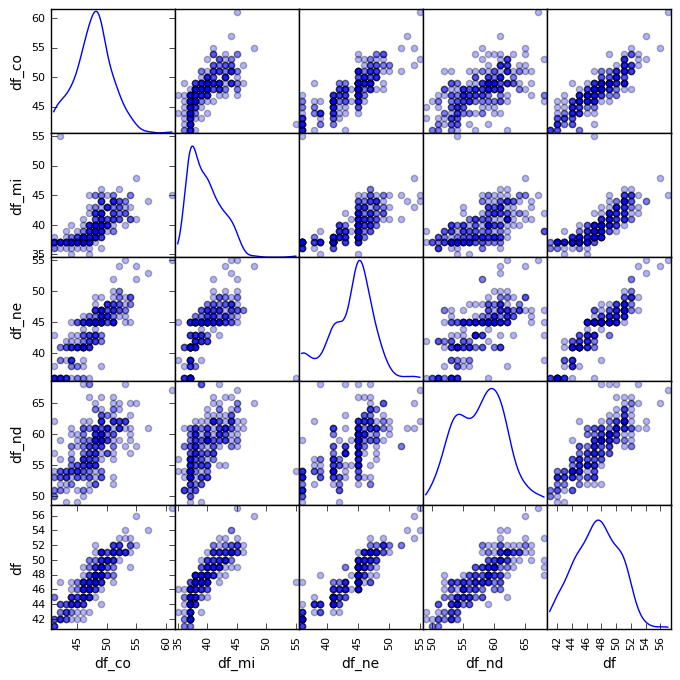

In [6]:
pd.scatter_matrix(df_data_all, alpha=0.3, figsize=(8,8), 
                  diagonal='kde', marker='o', grid=True);

# Test df average across locations

## Prep data

In [7]:
X = final_SNPs.values
print(final_SNPs.shape)
print(np.shape(X))

y = df_data_all['df'].values
print(np.shape(y))

(280, 243623)
(280, 243623)
(280,)


In [8]:
# create train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20, random_state=101)


print(np.shape(X_train), np.shape(X_test))

(224, 243623) (56, 243623)


## ElasticNET CV

In [9]:
from sklearn.linear_model import ElasticNetCV

EN_CV = ElasticNetCV(l1_ratio=[.1, .25, .5, .75, .9, .99], n_alphas = 100, 
                     alphas = np.logspace(-4, 2, 7, base=2), 
                     eps = np.logspace(-4, 2, 7, base=2),
                     max_iter=1000, n_jobs=-1, cv = 10, random_state=101, 
                     selection='random', tol = 0.0001)

EN_CV.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ]),
       copy_X=True, cv=10,
       eps=array([ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ]),
       fit_intercept=True, l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
       positive=False, precompute='auto', random_state=101,
       selection='random', tol=0.0001, verbose=0)

In [10]:
y_pred = EN_CV.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(pearsonr(y_test, y_pred))

1.30372937613
0.596258967135
(0.79038278380425253, 4.3593044955130142e-13)


The means absolute error of prediction is 1.30372937613 +/- 1.0195322616
95 perc CI of the mean 1.03670245366, 1.5707562986


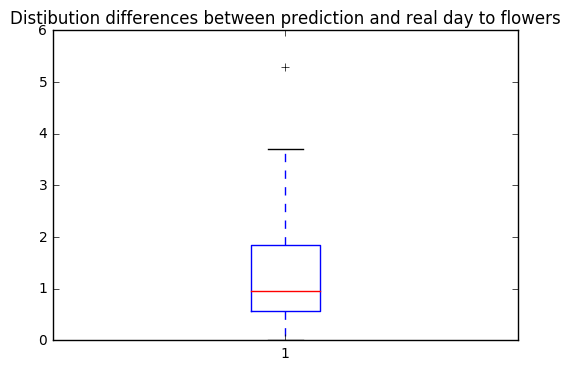

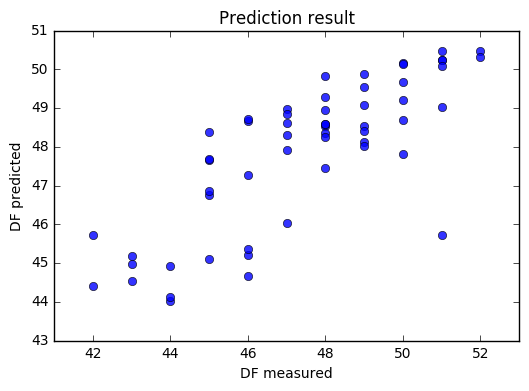

In [14]:
from scipy import stats
list_of_differences = np.abs(np.subtract(y_test, y_pred))
CI_95_interval = stats.norm.interval(0.95, 
                                     loc = np.mean(list_of_differences), 
                                     scale = np.std(list_of_differences)/np.sqrt(len(list_of_differences)))

print('The means absolute error of prediction is %s +/- %s' % (np.mean(list_of_differences), np.std(list_of_differences)))
print('95 perc CI of the mean %s, %s' % (CI_95_interval[0], CI_95_interval[1]))
plt.boxplot(list_of_differences)
plt.title('Distibution differences between prediction and real day to flowers')
plt.show()

plt.plot(y_test, y_pred, 'bo', alpha=0.8)
plt.xlim((41, 53))
plt.ylim((43, 51))
plt.xlabel('DF measured')
plt.ylabel('DF predicted')
plt.title('Prediction result')
plt.show()


In [17]:
#save model in case you need to plot it again
from sklearn.externals import joblib
joblib.dump(EN_CV, 'DF_average_across_areas_model_Elastic_net.pkl') 

result_df = pd.DataFrame({'DF_Pred': y_pred, 'DF_real': y_test})
result_df.to_csv('Model_evaluation_result_Average_ElasticNet.csv', sep=',', header=True, index=False)

from scipy.stats import linregress
linregress(y_pred, y_test)

LinregressResult(slope=1.093247215203877, intercept=-4.8661483654095079, rvalue=0.79038278380425253, pvalue=4.3593044955130026e-13, stderr=0.11531092316766531)

In [18]:
0.79038278380425253**2

0.6247049449341598

## LassoCV

There is also a LassoLars and LassoIC to try. And maybe multitask ElasticNet

In [19]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(n_alphas = 100, alphas = np.logspace(-4, 2, 7, base=2), 
                   eps = np.logspace(-4, 2, 7, base=2),
                   max_iter=1000, n_jobs=-1, cv = 10, random_state=101 )

lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ]),
    copy_X=True, cv=10,
    eps=array([ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ,  2.    ,  4.    ]),
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
    normalize=False, positive=False, precompute='auto', random_state=101,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
y_pred = lasso_cv.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_test, y_pred))
print(pearsonr(y_test, y_pred))

1.36805311846
0.562620057039
(0.77086089619612519, 3.6750768515925476e-12)


The means absolute error of prediction is 1.36805311846 +/- 1.04680853537
95 perc CI of the mean 1.03670245366, 1.5707562986


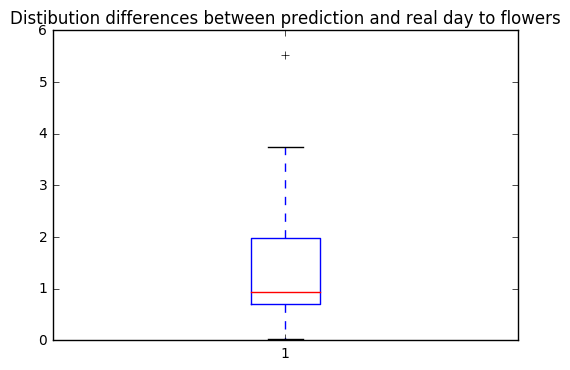

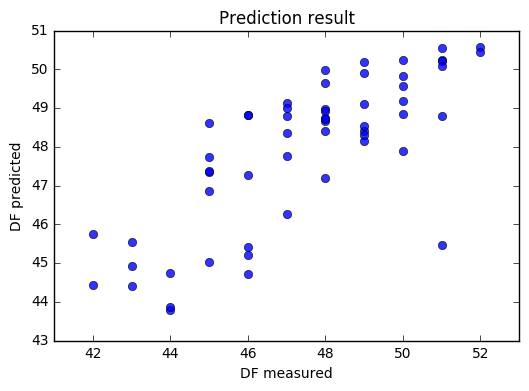

In [33]:
list_of_differences = np.abs(np.subtract(y_test, y_pred))
list_of_differences
print('The means absolute error of prediction is %s +/- %s' % (np.mean(list_of_differences), np.std(list_of_differences)))
print('95 perc CI of the mean %s, %s' % (CI_95_interval[0], CI_95_interval[1]))

plt.boxplot(list_of_differences)
plt.title('Distibution differences between prediction and real day to flowers')
plt.show()
plt.plot(y_test, y_pred, 'bo', alpha=0.8)
plt.xlim((41, 53))
#plt.ylim((43, 51))
plt.xlabel('DF measured')
plt.ylabel('DF predicted')
plt.title('Prediction result')
plt.show()

In [23]:
#save model in case you need to plot it again
from sklearn.externals import joblib
joblib.dump(EN_CV, 'DF_average_across_areas_model_Lasso.pkl') 

result_df = pd.DataFrame({'DF_Pred': y_pred, 'DF_real': y_test})
result_df.to_csv('Model_evaluation_result_Average_Lasso.csv', sep=',', header=True, index=False)

from scipy.stats import linregress
linregress(y_pred, y_test)

LinregressResult(slope=1.0359803103138987, intercept=-2.1820384013400229, rvalue=0.7708608961961253, pvalue=3.6750768515924991e-12, stderr=0.11649852720434076)

## Random Forest

with Optimized params

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import RandomizedSearchCV

rf = RandomForestRegressor(n_estimators = 10000, max_features='sqrt',
                          n_jobs=-1, random_state = 101)

#param_grid = {'criterion':['mse'],
#             'max_features':['sqrt', 'log2'],
#             'min_samples_split': np.linspace(2,20, 10).astype(int),
#              'min_samples_leaf': np.linspace(2,20, 10).astype(int),
#              'min_impurity_split': np.logspace(-30, -3, 10, base=2)
#             }

#gs = RandomizedSearchCV(estimator = rf_est,  param_distributions= param_grid, 
#                  scoring = 'mean_absolute_error',
#                  cv = 10, n_iter=20, n_jobs = 4)

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=-1, oob_score=False,
           random_state=101, verbose=0, warm_start=False)

In [26]:
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_pred, y_test))
print(r2_score(y_test, y_pred))
print(pearsonr(y_test, y_pred))

1.2477625
0.647409658962
(0.81674860866329968, 1.6637591468223664e-14)


The means absolute error of prediction is 1.2477625 +/- 0.913901704343
95 perc CI of the mean 1.03670245366, 1.5707562986


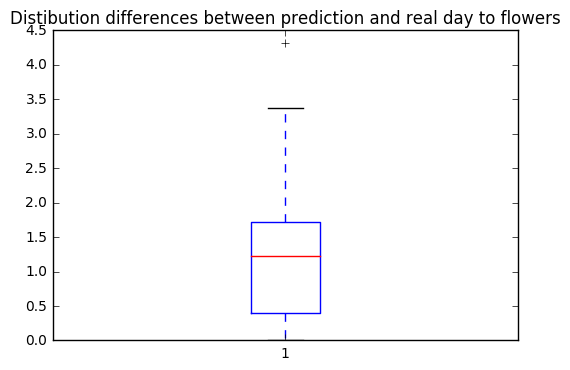

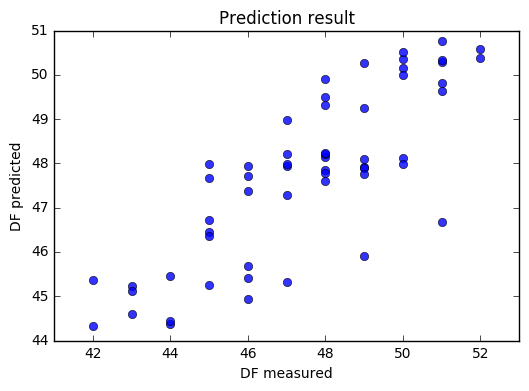

In [30]:
list_of_differences = np.abs(np.subtract(y_test, y_pred))
list_of_differences
print('The means absolute error of prediction is %s +/- %s' % (np.mean(list_of_differences), np.std(list_of_differences)))

print('95 perc CI of the mean %s, %s' % (CI_95_interval[0], CI_95_interval[1]))
plt.boxplot(list_of_differences)
plt.title('Distibution differences between prediction and real day to flowers')
plt.show()
plt.plot(y_test, y_pred, 'bo', alpha=0.8)
plt.xlim((41, 53))
#plt.ylim((43, 51))
plt.xlabel('DF measured')
plt.ylabel('DF predicted')
plt.title('Prediction result')
plt.show()

In [31]:
#save model in case you need to plot it again
from sklearn.externals import joblib
joblib.dump(EN_CV, 'DF_average_across_areas_model_RF.pkl') 

result_df = pd.DataFrame({'DF_Pred': y_pred, 'DF_real': y_test})
result_df.to_csv('Model_evaluation_result_Average_RF.csv', sep=',', header=True, index=False)

from scipy.stats import linregress
linregress(y_pred, y_test)

LinregressResult(slope=1.1278363042531148, intercept=-6.3771391656086536, rvalue=0.81674860866329979, pvalue=1.6637591468223342e-14, stderr=0.10842560281028188)